In [1]:
#fas-정재환
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np
import csv
import json
import seaborn as sns
%matplotlib inline 

In [2]:
#한글 폰트 적용 - 한글깨짐 방지
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# nrows를 이용해 csv파일에서 20만개의 데이터만 읽어온다
df = pd.read_csv('NHIS_OPEN_GJ_2017_2.csv', encoding='cp949', nrows=200000)
df

,번호,성별,연령,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당,총콜레스테롤,흡연상태,음주여부
0,1,1,8,170,75,90.0,120.0,80.0,99.0,193.0,1.0,1.0
1,2,1,7,180,80,89.0,130.0,82.0,106.0,228.0,3.0,0.0
2,3,1,9,165,75,91.0,120.0,70.0,98.0,136.0,1.0,0.0
3,4,1,11,175,80,91.0,145.0,87.0,95.0,201.0,1.0,0.0
4,5,1,11,165,60,80.0,138.0,82.0,101.0,199.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,1,9,170,100,107.0,135.0,88.0,112.0,247.0,3.0,1.0
199996,199997,2,6,155,45,63.0,107.0,61.0,83.0,151.0,1.0,1.0
199997,199998,1,11,160,70,91.0,100.0,76.0,100.0,222.0,1.0,0.0
199998,199999,1,8,170,75,88.2,147.0,89.0,81.0,125.0,3.0,1.0


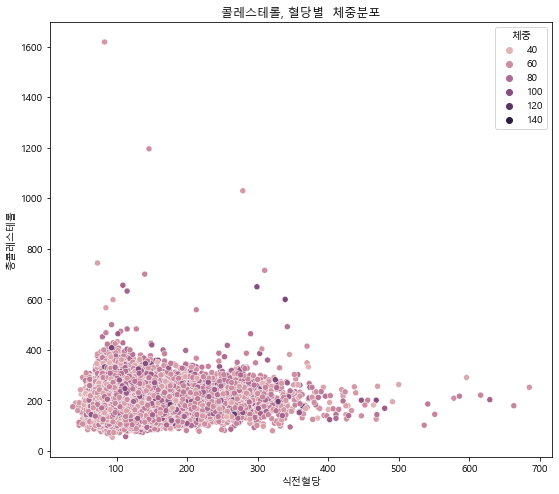

In [4]:
# scatter산점도, x축, y축, 그룹화
fig, axes = plt.subplots(figsize=(9, 8))
sns.scatterplot(x="식전혈당", y="총콜레스테롤", hue='체중', data = df, ax=axes)
plt.xlabel('식전혈당')
plt.ylabel('총콜레스테롤')
plt.title('콜레스테롤, 혈당별  체중분포')
plt.show()

In [5]:
# 위에서 읽어온 df 데이터프레임을 기반으로 피봇테아블 생성
# 체중 컬럼을 인덱스로 설정, 신장 컬럼의 값들을 컬럼으로 설정
# 각 위치마다 혈당 데이터 평균값 적용
df_pivot_mean = pd.pivot_table(df, index='체중', columns='신장', 
                               values='식전혈당', aggfunc='mean')
df_pivot_mean

신장,130,135,140,145,150,155,160,165,170,175,180,185,190
체중,,,,,,,,,,,,,
25,NaN,NaN,84.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,100.666667,97.866667,95.454545,93.857143,98.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,98.333333,102.307692,98.179487,103.147541,94.889831,88.269231,95.400000,NaN,NaN,NaN,NaN,NaN,NaN
40,97.222222,102.202532,103.217105,98.791489,94.728675,91.474065,89.625000,99.818182,79.000000,NaN,NaN,NaN,NaN
45,NaN,104.250000,101.576065,99.411281,95.877483,92.525013,91.144599,93.133791,95.189189,89.000000,NaN,NaN,NaN
50,NaN,103.290323,104.356989,101.103799,97.540210,95.109012,93.144868,93.512661,94.870192,93.964286,87.142857,NaN,NaN
55,NaN,107.571429,106.992958,103.191440,100.589533,97.820407,96.211003,95.962915,95.441309,95.174142,91.479167,NaN,NaN
60,NaN,101.000000,110.614754,107.649883,103.010623,101.510142,100.584337,100.030115,98.868982,94.793771,92.330233,91.666667,NaN
65,NaN,NaN,107.291667,108.005141,106.209530,103.282182,103.503860,102.608283,99.922953,97.887215,96.444664,91.914286,NaN


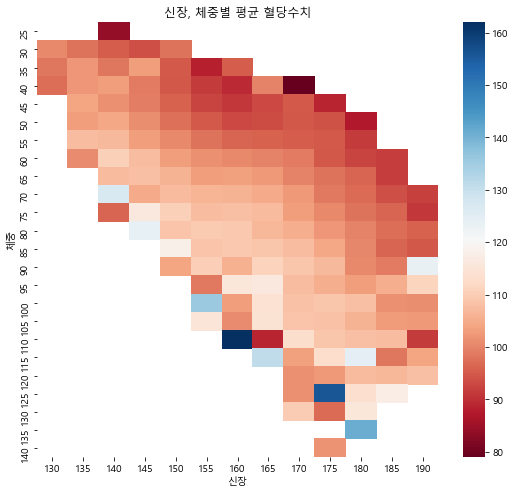

In [6]:
# heatmap - x,y축 좌표에서 특정 값을 기준으로 색깔을 나타낸다
# 판란색깔에 가까울수록 혈당 수치가 높은 데이터이다.
fig, axes = plt.subplots(figsize=(9, 8))
sns.heatmap(df_pivot_mean, cmap='RdBu', ax=axes)
plt.xlabel('신장')
plt.ylabel('체중')
plt.title('신장, 체중별 평균 혈당수치')
plt.show()

In [7]:
del df_pivot_mean # 메모리 반환, 누수 방지

In [8]:
# 위에서 읽어온 df 데이터프레임을 기반으로 피봇테아블 생성
# 체중 컬럼을 인덱스로 설정, 신장 컬럼의 값들을 컬럼으로 설정
# 각 위치마다 콜레스테롤 데이터 평균값 적용
df_pivot_mean = pd.pivot_table(df, index='체중', columns='신장', 
                               values='총콜레스테롤', aggfunc='mean')
df_pivot_mean

신장,130,135,140,145,150,155,160,165,170,175,180,185,190
체중,,,,,,,,,,,,,
25,NaN,NaN,199.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,215.666667,195.600000,187.727273,183.428571,177.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,189.333333,187.884615,196.589744,188.975410,192.101695,178.692308,175.400000,NaN,NaN,NaN,NaN,NaN,NaN
40,184.444444,191.784810,191.319079,193.421277,193.294918,186.628468,181.062500,184.666667,161.000000,NaN,NaN,NaN,NaN
45,NaN,188.514706,201.669371,197.465335,197.590490,191.055078,185.008827,181.917667,184.000000,165.400000,NaN,NaN,NaN
50,NaN,193.967742,193.578495,199.290636,200.162063,195.158447,187.855464,183.584475,178.423077,173.833333,178.857143,NaN,NaN
55,NaN,184.357143,199.228873,198.997108,200.419840,199.029100,193.473373,187.187353,184.314898,178.229551,181.312500,NaN,NaN
60,NaN,196.000000,195.893443,198.053864,200.246385,199.203638,195.235458,192.939165,188.857143,183.313131,175.451163,165.500000,NaN
65,NaN,NaN,190.625000,194.843188,198.851558,199.816993,197.007892,194.736120,193.473404,190.308632,182.600791,171.171429,NaN


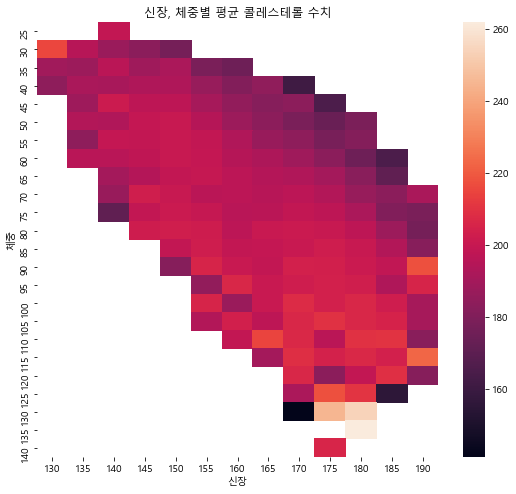

In [9]:
# heatmap - x,y축 좌표에서 특정 값을 기준으로 색깔을 나타낸다
# 연한 주황색깔에 가까울수록 콜레스테롤 수치가 높은 데이터이다.
fig, axes = plt.subplots(figsize=(9, 8))
sns.heatmap(df_pivot_mean, ax=axes)
plt.xlabel('신장')
plt.ylabel('체중')
plt.title('신장, 체중별 평균 콜레스테롤 수치')
plt.show()

In [10]:
# 체중이 적을수록 혈당, 콜레스테롤 수치가 비교적 낮게 분포하는 것을 확인할 수 있다

In [11]:
del df_pivot_mean # 메모리 반환, 누수 방지

In [12]:
# 위에서 읽어온 df 데이터프레임을 기반으로 피봇테아블 생성
# 흡연 컬럼을 인덱스로 설정, 음주여부 컬럼의 값들을 컬럼으로 설정
# 각 위치마다 혈당 데이터 평균값 적용
df_pivot_mean = pd.pivot_table(df, index='흡연상태', columns='음주여부',
                               values='식전혈당', aggfunc='mean')
df_pivot_mean

음주여부,0.0,1.0
흡연상태,,
1.0,99.245672,97.270094
2.0,104.455291,104.017546
3.0,102.777003,103.198649


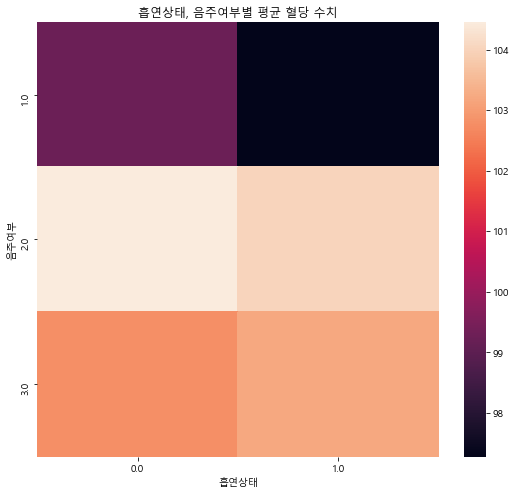

In [13]:
# heatmap - x,y축 좌표에서 특정 값을 기준으로 색깔을 나타낸다
# 밝은색깔에 가까울수록 혈당 수치가 높은 데이터이다.
fig, axes = plt.subplots(figsize=(9, 8))
sns.heatmap(df_pivot_mean, ax=axes)
plt.xlabel('흡연상태')
plt.ylabel('음주여부')
plt.title('흡연상태, 음주여부별 평균 혈당 수치')
plt.show()

In [14]:
del df_pivot_mean # 메모리 반환, 누수 방지

In [15]:
# 위에서 읽어온 df 데이터프레임을 기반으로 피봇테아블 생성
# 흡연 컬럼을 인덱스로 설정, 음주여부 컬럼의 값들을 컬럼으로 설정
# 각 위치마다 혈당 데이터 평균값 적용
df_pivot_mean = pd.pivot_table(df, index='흡연상태', columns='음주여부', 
                               values='총콜레스테롤', aggfunc='mean')
df_pivot_mean

음주여부,0.0,1.0
흡연상태,,
1.0,195.632216,194.850191
2.0,188.616549,197.728284
3.0,195.071664,197.633159


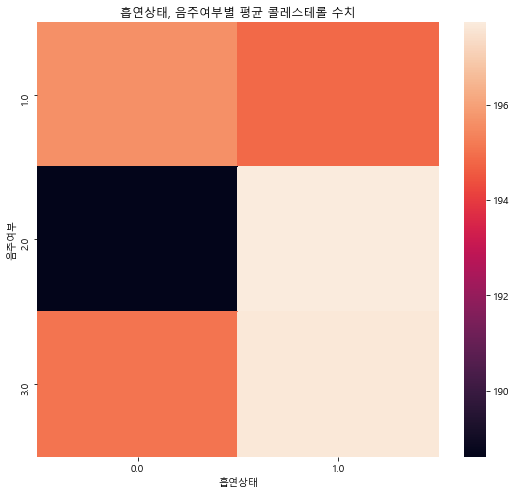

In [16]:
# heatmap - x,y축 좌표에서 특정 값을 기준으로 색깔을 나타낸다
# 밝은색깔에 가까울수록 콜레스테롤 수치가 높은 데이터이다.
fig, axes = plt.subplots(figsize=(9, 8))
sns.heatmap(df_pivot_mean, ax=axes)
plt.xlabel('흡연상태')
plt.ylabel('음주여부')
plt.title('흡연상태, 음주여부별 평균 콜레스테롤 수치')
plt.show()

In [17]:
# 음주여부 데이터가 높을수록 혈당, 콜레스테롤 수치가 비교적 높게 분포하는것을 확인할 수 있다

In [18]:
del df_pivot_mean # 메모리 반환, 누수 방지

In [19]:
# 이번에는 aggfunc속성을 count로 지정하여 해당 데이터의 갯수를 통켸로 나타낸다
# 위에서 읽어온 df 데이터프레임을 기반으로 피봇테아블 생성
# 흡연 컬럼을 인덱스로 설정, 음주여부 컬럼의 값들을 컬럼으로 설정
df_pivot_count = pd.pivot_table(df, index='신장', columns='체중', 
                                values="식전혈당", aggfunc='count')
df_pivot_count

체중,25,30,35,40,45,50,55,60,65,70,...,95,100,105,110,115,120,125,130,135,140
신장,,,,,,,,,,,,,,,,,,,,,
130,NaN,3.0,6.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,NaN,15.0,52.0,79.0,68.0,31.0,14.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,1.0,11.0,78.0,304.0,493.0,465.0,284.0,122.0,24.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,NaN,7.0,122.0,705.0,1702.0,2264.0,1729.0,854.0,389.0,110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,NaN,1.0,118.0,1102.0,3575.0,5720.0,5121.0,3389.0,1637.0,679.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,NaN,NaN,26.0,829.0,3958.0,7623.0,8213.0,6212.0,3519.0,1648.0,...,8.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160,NaN,NaN,5.0,304.0,2379.0,6040.0,7943.0,7891.0,5829.0,3474.0,...,37.0,9.0,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
165,NaN,NaN,NaN,33.0,583.0,2409.0,4665.0,6608.0,7799.0,6424.0,...,141.0,50.0,13.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN
170,NaN,NaN,NaN,1.0,74.0,624.0,1772.0,3801.0,6204.0,7538.0,...,451.0,221.0,94.0,42.0,17.0,8.0,3.0,1.0,NaN,NaN


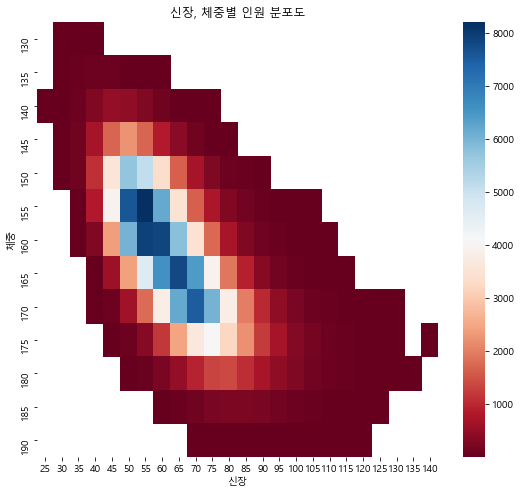

In [20]:
# heatmap - x,y축 좌표에서 특정 값을 기준으로 색깔을 나타낸다
# 판란색깔에 많은 인원이 분포하고 있는 것이다.
fig, axes = plt.subplots(figsize=(9, 8))
sns.heatmap(df_pivot_count, cmap='RdBu', ax=axes)
plt.xlabel('신장')
plt.ylabel('체중')
plt.title('신장, 체중별 인원 분포도')
plt.show()

In [21]:
del df_pivot_count #메모리 반환, 누수 방지